In [16]:
#!pip install wordcloud

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sa3id\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
data=pd.read_csv('data/raw_data.csv')
data.head()

,Unnamed: 0,paperId,externalIds,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,publicationDate,title_abstract
0,0,a1d703d8f9aeab0f3082447ac9ac0aa723259c75,"{'MAG': '2095039986', 'DOI': '10.1021/ja909108...","{'id': '4193a393-c091-455e-858d-3d2c151b52b8',...",Fabrication of Ag@SiO(2)@Y(2)O(3):Er nanostruc...,We demonstrated that the nanostructures compri...,2010,13,460,4,"['Chemistry', 'Medicine']","[{'category': 'Chemistry', 'source': 'external...",['JournalArticle'],2010-02-16,Fabrication Ag@SiO(2)@Y(2)O(3):Er nanostructur...
1,1,bd9ac8fa6ab431f5595bfc4709c572e836cab287,"{'MAG': '2473345418', 'DOI': '10.1515/BCHM2.19...","{'id': '2411ecfa-0387-4176-ab56-ba0533fd8d54',...",[Amino acid-p-nitroanilide as a substrate for ...,NaN,1962,0,173,0,"['Biology', 'Medicine']","[{'category': 'Biology', 'source': 'external'}...",['JournalArticle'],1962-11-15,[Amino acid-p-nitroanilide substrate aminopept...
2,2,da7e3ad5e8ec3ed22294994748e9f7edbf923ecd,"{'MAG': '1528109329', 'CorpusId': 9770663, 'Pu...","{'id': 'aa4908c0-fc23-4dc5-99b3-ccc6d7c94c24',...",The incidence of mandated maternity benefits.,I consider the labor-market effects of mandate...,1994,13,1009,78,"['Economics', 'Medicine']","[{'category': 'Economics', 'source': 'external...",['JournalArticle'],NaN,incidence mandated maternity benefits. conside...
3,3,57e3d0266d3f0a5f7ff529acd86b0a4a3ad5231a,"{'MAG': '2111613011', 'DOI': '10.1093/BRAIN/AW...",NaN,The precuneus: a review of its functional anat...,Functional neuroimaging studies have started u...,2006,155,4409,184,"['Psychology', 'Medicine']","[{'category': 'Psychology', 'source': 'externa...","['Review', 'JournalArticle']",2006-03-01,precuneus: review functional anatomy behaviour...
4,4,b993d54291b7e0bd2d14b6880a390d7bf630ec91,"{'MAG': '1973005880', 'DOI': '10.1038/301621A0...","{'id': '6c24a0a0-b07d-4d7b-a19b-fd09a3ed453a',...","Phorbol esters increase the amount of Ca2+, ph...",NaN,1983,25,1202,11,"['Chemistry', 'Medicine']","[{'category': 'Chemistry', 'source': 'external...",['JournalArticle'],1983-02-17,"Phorbol esters increase Ca2+, phospholipid-dep..."


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53833 entries, 0 to 53832
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                53833 non-null  int64 
 1   paperId                   53833 non-null  object
 2   externalIds               53833 non-null  object
 3   publicationVenue          30673 non-null  object
 4   title                     53833 non-null  object
 5   abstract                  38581 non-null  object
 6   year                      53833 non-null  int64 
 7   referenceCount            53833 non-null  int64 
 8   citationCount             53833 non-null  int64 
 9   influentialCitationCount  53833 non-null  int64 
 10  fieldsOfStudy             52384 non-null  object
 11  s2FieldsOfStudy           53833 non-null  object
 12  publicationTypes          34229 non-null  object
 13  publicationDate           46284 non-null  object
 14  title_abstract        

In [20]:
# Data Overview
print("Data Overview:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data[['year', 'citationCount']].describe())

Data Overview:
   Unnamed: 0                                   paperId   
0           0  a1d703d8f9aeab0f3082447ac9ac0aa723259c75  \
1           1  bd9ac8fa6ab431f5595bfc4709c572e836cab287   
2           2  da7e3ad5e8ec3ed22294994748e9f7edbf923ecd   
3           3  57e3d0266d3f0a5f7ff529acd86b0a4a3ad5231a   
4           4  b993d54291b7e0bd2d14b6880a390d7bf630ec91   

                                         externalIds   
0  {'MAG': '2095039986', 'DOI': '10.1021/ja909108...  \
1  {'MAG': '2473345418', 'DOI': '10.1515/BCHM2.19...   
2  {'MAG': '1528109329', 'CorpusId': 9770663, 'Pu...   
3  {'MAG': '2111613011', 'DOI': '10.1093/BRAIN/AW...   
4  {'MAG': '1973005880', 'DOI': '10.1038/301621A0...   

                                    publicationVenue   
0  {'id': '4193a393-c091-455e-858d-3d2c151b52b8',...  \
1  {'id': '2411ecfa-0387-4176-ab56-ba0533fd8d54',...   
2  {'id': 'aa4908c0-fc23-4dc5-99b3-ccc6d7c94c24',...   
3                                                NaN   
4  {'id': '6c

In [21]:
# Count the number of words in the 'title' column
data['title_word_count'] = data['title'].apply(lambda x: len(word_tokenize(str(x))))

# Calculate the length of the 'title' column
data['title_length'] = data['title'].apply(lambda x: len(str(x)))

# Count the number of words in the 'abstract' column
data['abstract_word_count'] = data['abstract'].apply(lambda x: len(word_tokenize(str(x))))

# Calculate the length of the 'abstract' column
data['abstract_length'] = data['abstract'].apply(lambda x: len(str(x)))

# Display the first few rows of the modified DataFrame
print(data[['title', 'title_word_count', 'title_length', 'abstract_word_count', 'abstract_length']].head())


                                               title  title_word_count   
0  Fabrication of Ag@SiO(2)@Y(2)O(3):Er nanostruc...                32  \
1  [Amino acid-p-nitroanilide as a substrate for ...                14   
2      The incidence of mandated maternity benefits.                 7   
3  The precuneus: a review of its functional anat...                13   
4  Phorbol esters increase the amount of Ca2+, ph...                15   

   title_length  abstract_word_count  abstract_length  
0           134                  108              611  
1            93                    1                3  
2            45                  102              616  
3            77                  349             2354  
4           113                    1                3  


In [22]:
data = data.dropna()


In [23]:
import pandas as pd

# Count NaN values in the entire DataFrame
nan_count = data.isna().sum().sum()

# Alternatively, count NaN values in each column separately
nan_count_per_column = data#.isna().sum()

print("Total NaN values in the DataFrame:", nan_count)
print("NaN count per column:")
print(nan_count_per_column)


Total NaN values in the DataFrame: 0
NaN count per column:
       Unnamed: 0                                   paperId   
0               0  a1d703d8f9aeab0f3082447ac9ac0aa723259c75  \
6               6  5ee29a0137bd4aeab8c7b7fdb13f3feb36a74db1   
7               7  bd21ceddfb38d7fe3658618c448f260230d264d0   
8               8  3421beb461a9e3e12e970ccbac7a0cfc2e738da8   
9               9  c1e3ed07b3ff01ce389c08f2d7884b5e8dae733f   
...           ...                                       ...   
53823       53823  e619cf7710203e94b68bd97e8251503defe7b94a   
53827       53827  cc1ae0da910b76e1fe0dfccd7ce1969624977ec2   
53828       53828  38dfa070a155a4b822faccd13ceeb1207c7a156f   
53829       53829  8985784022a93aa62f55dfa909e65185d291228d   
53830       53830  3fab47f0aba5f05a9741793a13edb77e75dbd515   

                                             externalIds   
0      {'MAG': '2095039986', 'DOI': '10.1021/ja909108...  \
6      {'MAG': '2052825417', 'DOI': '10.2337/diacare....   
7   

In [24]:
import pandas as pd

# Assuming 'data' is your DataFrame
zero = data.isnull().sum()
zero

Unnamed: 0                  0
paperId                     0
externalIds                 0
publicationVenue            0
title                       0
abstract                    0
year                        0
referenceCount              0
citationCount               0
influentialCitationCount    0
fieldsOfStudy               0
s2FieldsOfStudy             0
publicationTypes            0
publicationDate             0
title_abstract              0
title_word_count            0
title_length                0
abstract_word_count         0
abstract_length             0
dtype: int64

In [25]:
data.to_csv('clean_raw_data.csv',index=False)


In [26]:
data=pd.read_csv('clean_raw_data.csv')


In [27]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"two", "one", "results", "e", "study","also","found","used","p","results","group","using","n"}
stop_words.update(custom_stopwords)

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# Assuming you have a DataFrame 'data' with 'title' and 'abstract' columns
data['title_tokens'] = data['title'].apply(preprocess_text)
data['abstract_tokens'] = data['abstract'].apply(preprocess_text)

# Calculate the most frequent words in 'title' and 'abstract'
title_word_counts = Counter(word for words in data['title_tokens'] for word in words)
abstract_word_counts = Counter(word for words in data['abstract_tokens'] for word in words)

# Get the most common words (e.g., top 10)
top_title_words = title_word_counts.most_common(10)
top_abstract_words = abstract_word_counts.most_common(10)

# Display the most frequent words in 'title' and 'abstract'
print("Top words in 'title':")
for word, count in top_title_words:
    print(f"{word}: {count}")

print("\nTop words in 'abstract':")
for word, count in top_abstract_words:
    print(f"{word}: {count}")


# Display the first 100 abstracts
first_100_abstracts = data['abstract'][:100]
print("\nFirst 100 abstracts:")
for idx, abstract in enumerate(first_100_abstracts):
    print(f"Abstract {idx + 1}:\n{abstract}\n")


Top words in 'title':
human: 975
coli: 961
escherichia: 821
cells: 765
disease: 636
patients: 625
cell: 625
clinical: 573
protein: 483
cancer: 464

Top words in 'abstract':
patients: 12733
cells: 9729
cell: 6261
may: 5708
coli: 5647
disease: 4927
data: 4263
treatment: 4086
human: 4080
protein: 4030

First 100 abstracts:
Abstract 1:
We demonstrated that the nanostructures comprising silver cores and dense layers of Y(2)O(3):Er separated by a silica shell are an excellent model system to study the interaction between upconversion materials and metals in nanoscale. This architecture allows for versatile control of the Y(2)O(3):Er-metal interaction through control of the silica dielectric spacer thickness and the metal-core size. Finally, the nanoparticles are potentially interesting as fluorescent labels in, for instance (single particle), imaging experiments or bioassays which require low background or tissue penetrating wavelengths.

Abstract 2:
OBJECTIVE Free radical production has bee

In [28]:
# top 100 abstact combined with the most common to 10 words
data['title_tokens'] = data['title'].apply(preprocess_text)
data['abstract_tokens'] = data['abstract'].apply(preprocess_text)

# Calculate the most frequent words in 'title' and 'abstract'
title_word_counts = Counter(word for words in data['title_tokens'] for word in words)
abstract_word_counts = Counter(word for words in data['abstract_tokens'] for word in words)

# Get the most common words (e.g., top 10)
top_title_words = [word for word, _ in title_word_counts.most_common(10)]
top_abstract_words = [word for word, _ in abstract_word_counts.most_common(10)]

# Filter rows that contain at least one of the top words in 'abstract'
filtered_data = data[data['abstract_tokens'].apply(lambda tokens: any(word in tokens for word in top_abstract_words))]

# Display the first 100 abstracts
first_100_abstracts = filtered_data['abstract'][:100]
for idx, abstract in enumerate(first_100_abstracts):
    print(f"Abstract {idx + 1}:\n{abstract}\n")

Abstract 1:
OBJECTIVE Free radical production has been reported to be increased in diabetic patients and to be involved in the pathogenesis of diabetic complications. In this study, a standardized meal was administered to 10 type 2 diabetic patients and 10 healthy matched normal subjects to evaluate its effects on plasma oxidative stress generation. RESEARCH DESIGN AND METHODS In diabetic patients, at baseline and after the meal, plasma malondialdehyde (MDA), vitamin C, protein SH groups, uric acid, vitamin E, and total plasma radical-trapping parameter, which evaluates plasma antioxidant capacity due to known and unknown antioxidants present in the plasma as well as their mutual cooperation, were measured. RESULTS After the meal, plasma MDA and vitamin C increased, while protein SH groups, uric acid, vitamin E, and total plasma radical-trapping parameter decreased more significantly in the diabetic subjects than in control subjects. CONCLUSIONS This finding shows that in the absorptiv

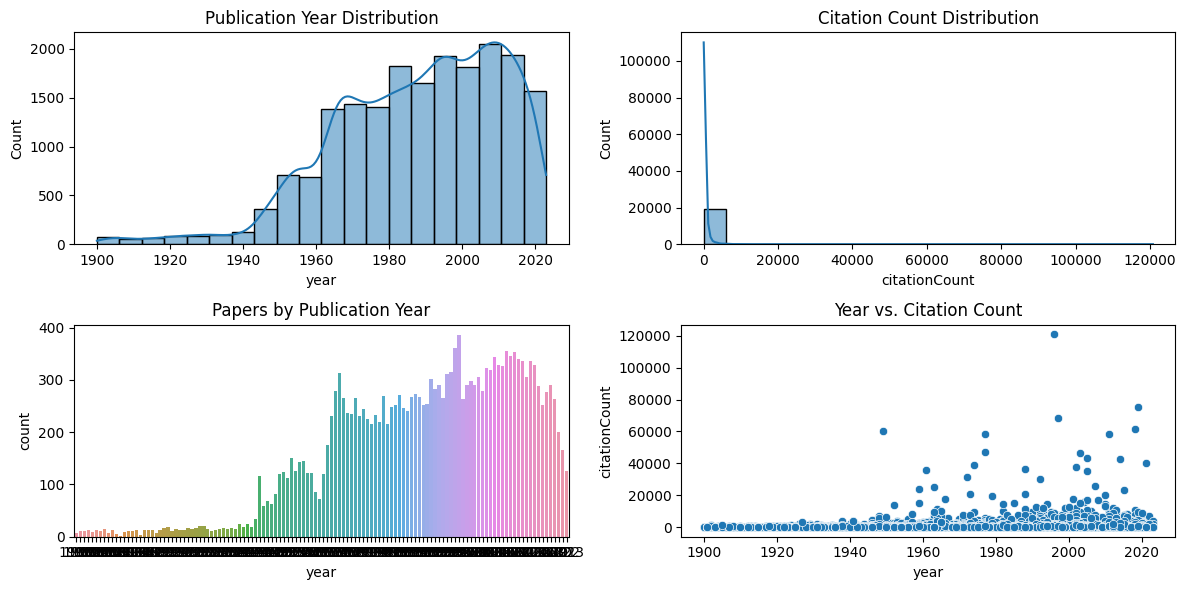

In [29]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='year', bins=20, kde=True)
plt.title('Publication Year Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x='citationCount', bins=20, kde=True)
plt.title('Citation Count Distribution')

# Bar chart of papers by publication year
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='year')
plt.title('Papers by Publication Year')

# Scatter plot of year vs. citationCount
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='year', y='citationCount')
plt.title('Year vs. Citation Count')

plt.tight_layout()
plt.show()

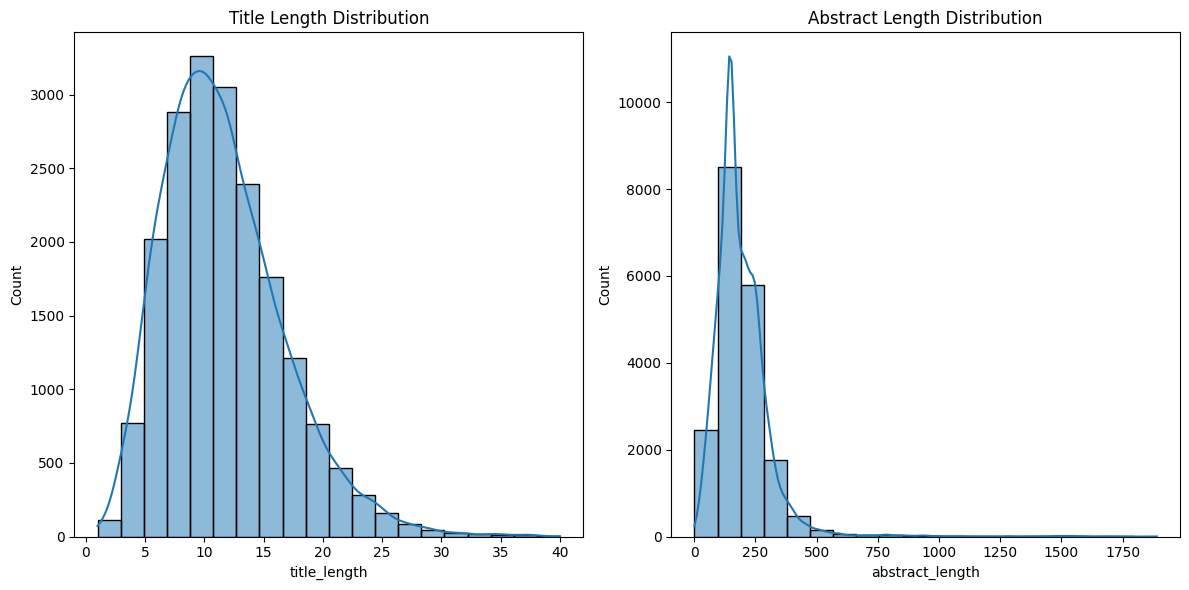

In [30]:
# Text Analysis (Title and Abstract Lengths)
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))
data['abstract_length'] = data['abstract'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='title_length', bins=20, kde=True)
plt.title('Title Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='abstract_length', bins=20, kde=True)
plt.title('Abstract Length Distribution')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sa3id\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


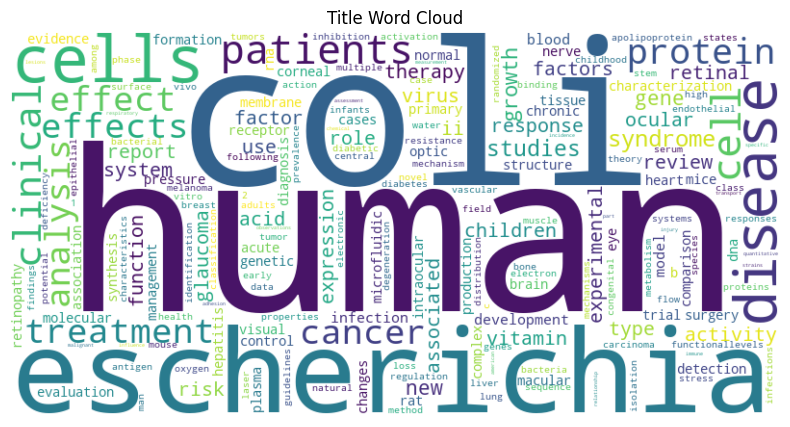

In [31]:
# Word Frequency Analysis (Title and Abstract)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Add custom stopwords
############################################################### to add or remove it later
custom_stopwords = {"two", "one", "results", "e", "study","also","found","used","p","results","group","using","n"}
stop_words.update(custom_stopwords)
###############################################################
# Function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    words = nltk.word_tokenize(str(text).lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

# Tokenize title and abstract
data['title_tokens'] = data['title'].apply(preprocess_and_tokenize)
data['abstract_tokens'] = data['abstract'].apply(preprocess_and_tokenize)

# Title Word Frequency Analysis
title_words = [word for sublist in data['title_tokens'] for word in sublist]
title_word_freq = Counter(title_words)
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Title Word Cloud')
plt.show()

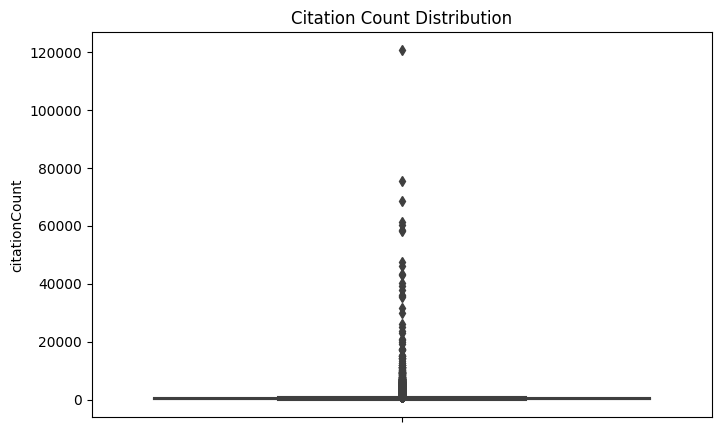

In [32]:
# Citation Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='citationCount')
plt.title('Citation Count Distribution')
plt.show()

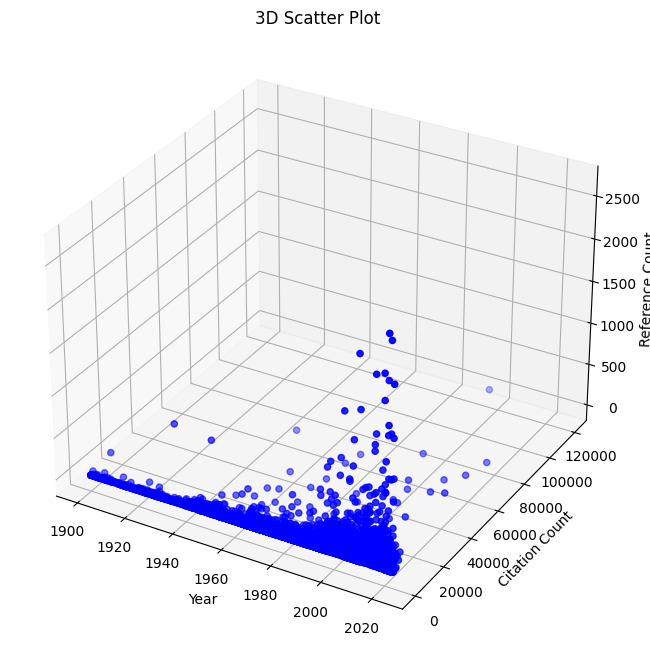

In [33]:
# 3D scatter plot of year, citationCount, and another numeric variable 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['year'], data['citationCount'], data['referenceCount'], c='blue', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Citation Count')
ax.set_zlabel('Reference Count')

plt.title('3D Scatter Plot')
plt.show()
# random data for demonstration
np.random.seed(42)
x = np.random.rand(1000)
y = np.random.rand(1000)
z = np.random.rand(1000)

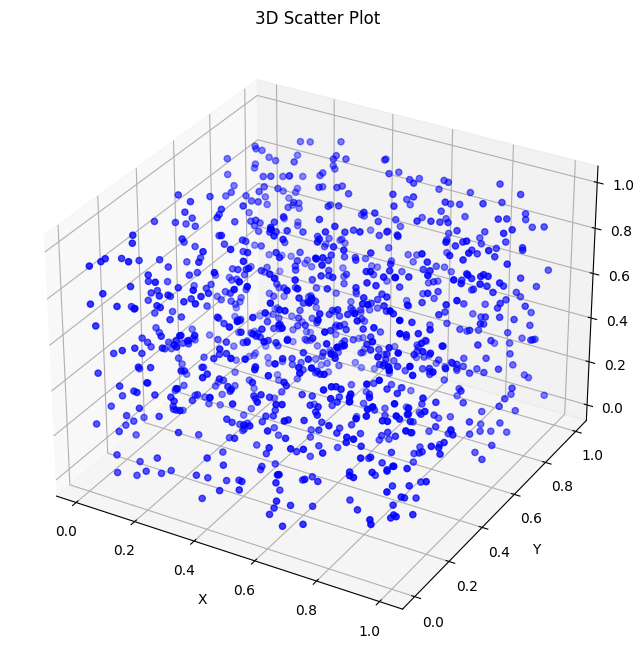

In [34]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# title
ax.set_title('3D Scatter Plot')

plt.show()

In [35]:
# random seed for reproducibility
np.random.seed(0)
n_points = 100
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)

# DataFrame
df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

# Assign a color based on the Z values
color_column = df['Z']

# 3D scatter plot with a colormap
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=color_column, title='3D Scatter Plot')
fig.show()